In [1]:
!pip install gensim umap-learn matplotlib seaborn


In [2]:
# Install necessary packages

from gensim.utils import simple_preprocess
import random
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import pandas as pd
from gensim.models import Word2Vec, FastText

# Slang list
slang_words = [
    "sus", "cap", "vibe", "bruh", "lit", "flex", "ghosted", "lowkey", "highkey", "yeet",
    "stan", "simp", "noob", "pog", "mood", "shade", "drip", "goat", "cringe", "based",
    "ratio", "mid", "slay", "rizz", "bet", "cheugy", "snatched", "gyatt", "delulu", "npc",
    "bussin", "onfleek", "fire", "boujee", "nope", "deadass", "fr", "skrrt", "pressed", "hits-diff"
]


templates = [
    "That's so {}!", "He totally {} me yesterday.", "I feel really {} today.",
    "She was acting kinda {}.", "This track is {} no lie.", "You can't {} like that.",
    "It's a total {} moment.", "He's the {} of our group.", "Why are you being so {}?",
    "I'm gonna {} this real quick."
]

def generate_slang_sentences(num_sentences=1000):
    corpus = []
    for _ in range(num_sentences):
        template = random.choice(templates)
        word = random.choice(slang_words)
        sentence = template.format(word)
        tokens = simple_preprocess(sentence)
        corpus.append(tokens)
    return corpus

slang_corpus = generate_slang_sentences(1000)
print("Sample:", slang_corpus[:5])


Sample: [['that', 'so', 'nope'], ['gonna', 'npc', 'this', 'real', 'quick'], ['he', 'the', 'gyatt', 'of', 'our', 'group'], ['this', 'track', 'is', 'boujee', 'no', 'lie'], ['gonna', 'fr', 'this', 'real', 'quick']]


In [3]:
w2v_model = Word2Vec(
    sentences=slang_corpus,
    vector_size=100,
    window=3,
    min_count=1,
    sg=1,
    workers=4,
    epochs=50
)

ft_model = FastText(
    sentences=slang_corpus,
    vector_size=100,
    window=3,
    min_count=1,
    sg=1,
    workers=4,
    epochs=50
)

print("Word2Vec and FastText models trained successfully.")


Word2Vec and FastText models trained successfully.


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


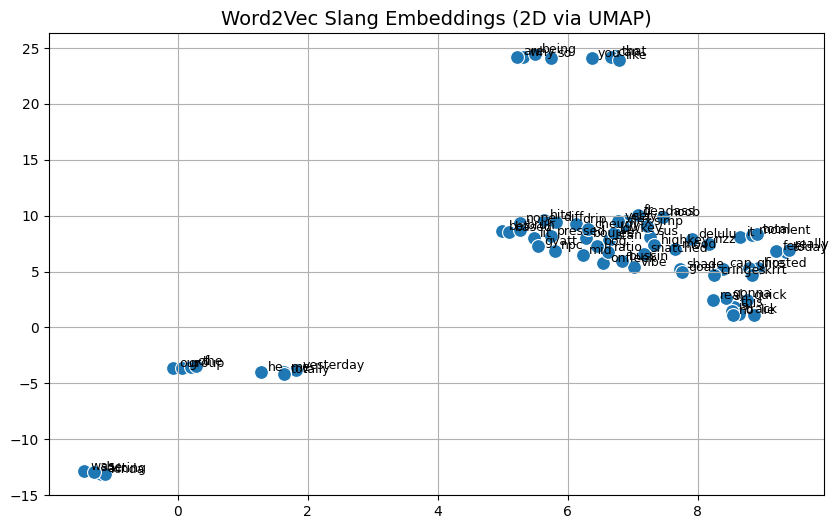

In [4]:
w2v_vocab = list(w2v_model.wv.index_to_key)
w2v_vectors = [w2v_model.wv[word] for word in w2v_vocab]

reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='cosine', random_state=42)
w2v_2d = reducer.fit_transform(w2v_vectors)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=w2v_2d[:, 0], y=w2v_2d[:, 1], s=100)

for i, word in enumerate(w2v_vocab):
    plt.text(w2v_2d[i, 0]+0.1, w2v_2d[i, 1]+0.1, word, fontsize=9)

plt.title("Word2Vec Slang Embeddings (2D via UMAP)", fontsize=14)
plt.grid(True)
plt.show()


In [7]:
print("Top similar to 'vibe':", w2v_model.wv.most_similar('vibe'))
print("Top similar to 'cap':", w2v_model.wv.most_similar('cap'))
print("Top similar to 'bruh':", w2v_model.wv.most_similar('bruh'))


Top similar to 'vibe': [('onfleek', 0.8839797377586365), ('bussin', 0.872498095035553), ('goat', 0.8566151261329651), ('cringe', 0.8365994691848755), ('shade', 0.8159661889076233), ('skrrt', 0.8041557669639587), ('ghosted', 0.778694748878479), ('rizz', 0.7779563665390015), ('mid', 0.7703161835670471), ('fire', 0.7616499066352844)]
Top similar to 'cap': [('ghosted', 0.8930937647819519), ('fire', 0.8858343362808228), ('goat', 0.8693902492523193), ('shade', 0.8544554114341736), ('cringe', 0.8533637523651123), ('skrrt', 0.851569414138794), ('bruh', 0.7606157064437866), ('delulu', 0.7305391430854797), ('feel', 0.7284595370292664), ('really', 0.7253232002258301)]
Top similar to 'bruh': [('based', 0.8926858305931091), ('pressed', 0.8515817523002625), ('deadass', 0.8451378345489502), ('bet', 0.835780143737793), ('shade', 0.833345890045166), ('fire', 0.8265309929847717), ('sus', 0.8045161962509155), ('lit', 0.7979510426521301), ('yeet', 0.7910833358764648), ('mood', 0.7791404724121094)]


In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def similarity_heatmap(words, model, title="Slang Similarity Heatmap"):
    sim_matrix = np.zeros((len(words), len(words)))

    for i, w1 in enumerate(words):
        for j, w2 in enumerate(words):
            if w1 in model.wv and w2 in model.wv:
                sim_matrix[i][j] = model.wv.similarity(w1, w2)
            else:
                sim_matrix[i][j] = 0.0

    plt.figure(figsize=(8, 6))
    sns.heatmap(sim_matrix, xticklabels=words, yticklabels=words, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()



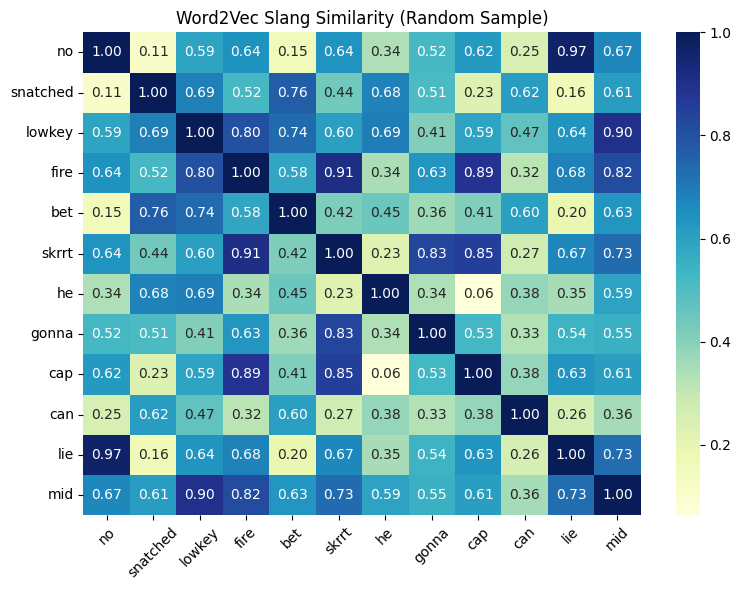

In [9]:
import random

selected_words = random.sample(w2v_model.wv.index_to_key, 12)
similarity_heatmap(selected_words, w2v_model, title="Word2Vec Slang Similarity (Random Sample)")


### SLANG BOT

In [21]:
!pip install markovify
import markovify

# Flatten your tokenized corpus into plain text
flat_slang_sentences = [' '.join(tokens) for tokens in slang_corpus]

# Create a Markov chain model from the text
markov_model = markovify.Text('\n'.join(flat_slang_sentences), state_size=2)
print("Markov slang model trained.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 6.8 MB/s eta 0:00:00
Markov slang model trained.


In [23]:
slang_prefixes = [
    "fr", "deadass", "no cap", "ngl", "lowkey", "highkey", "sheesh", "bet", "say less",
    "on god", "real talk", "broooo", "yo fam", "this finna be wild", "ain’t no way",
    "stop the cap", "real ones know", "it’s giving", "i’m shook", "straight facts",
    "you wildin", "for real for real", "you vibin", "skrrt", "this bussin", "legit",
    "nah fam", "on fleek", "don’t @ me", "that part", "💀", "🗿", "🔥", "💅", "🫡"
]

In [26]:
def slang_chatbot(user_input):
    input_tokens = user_input.lower().split()
    slang_replies = []

    # Find slang-related words
    for token in input_tokens:
        if token in w2v_model.wv:
            similar = w2v_model.wv.most_similar(token, topn=5)
            slang_replies.extend([word for word, _ in similar])

    # Try Markov response
    markov_line = markov_model.make_short_sentence(80)

    if markov_line:
        prefix = random.choice(slang_prefixes)
        return f"{prefix}, {markov_line}"

    # If Markov fails, craft a slangy reply
    fallback_templates = [
        "that's so {slang}, no cap.",
        "you kinda giving off {slang} vibes rn.",
        "i feel that, it's totally {slang}.",
        "bro that's legit {slang}.",
        "happens to the best, stay {slang}.",
        "nahh that's wild, you {slang} fr.",
        "sounds {slang}, not gonna lie."
    ]

    if slang_replies:
        selected_slang = random.choice(slang_replies)
    else:
        selected_slang = random.choice(slang_words)

    template = random.choice(fallback_templates)
    prefix = random.choice(slang_prefixes)
    return f"{prefix}, {template.format(slang=selected_slang)}"


In [28]:
# Launch a text-based chat loop (use in notebook)
print("...............SlangBot is live! Type 'exit' to stop chatting...............\n")
while True:
    user = input("You: ")
    if user.lower() in ["exit", "quit"]:
        print("................Aight, peace out homie..........")
        break
    response = slang_chatbot(user)
    print("SlangBot:", response)


...............SlangBot is live! Type 'exit' to stop chatting...............

You: hello homie
SlangBot: on fleek, happens to the best, stay goat.
You: fr
SlangBot: broooo, that's so vibe, no cap.
You: fr it is 
SlangBot: 🫡, feel really cap today gonna cringe this real quick
You: no cap
SlangBot: this bussin, bro that's legit track.
You: exit
................Aight, peace out homie..........


### SMART SLANGBOT

In [10]:
from huggingface_hub import login
login()


In [11]:
!pip install transformers accelerate --quiet

from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

model_name = "google/gemma-2b-it"

tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token  # Required for padding
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    torch_dtype=torch.bfloat16  # faster and smaller
)
model.eval()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

GemmaForCausalLM(
  (model): GemmaModel(
    (embed_tokens): Embedding(256000, 2048, padding_idx=0)
    (layers): ModuleList(
      (0-17): 18 x GemmaDecoderLayer(
        (self_attn): GemmaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=256, bias=False)
          (v_proj): Linear(in_features=2048, out_features=256, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
        )
        (mlp): GemmaMLP(
          (gate_proj): Linear(in_features=2048, out_features=16384, bias=False)
          (up_proj): Linear(in_features=2048, out_features=16384, bias=False)
          (down_proj): Linear(in_features=16384, out_features=2048, bias=False)
          (act_fn): GELUActivation()
        )
        (input_layernorm): GemmaRMSNorm((2048,), eps=1e-06)
        (post_attention_layernorm): GemmaRMSNorm((2048,), eps=1e-06)
      )
    )
    (norm): GemmaRMSNorm((2048,), 

In [25]:
def generate_base_response(user_input, max_new_tokens=80):
    identity = (
        "You are SlangBot — an informal, humorous chatbot powered by a Google AI model "
        "and trained on Gen-Z, TikTok, and internet slang. Reply casually and in character."
    )

    prompt = tokenizer.apply_chat_template(
        [{"role": "user", "content": f"{identity} {user_input}"}],
        tokenize=False, add_generation_prompt=True
    )

    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

    outputs = model.generate(
        **inputs,
        max_new_tokens=max_new_tokens,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        temperature=0.9
    )

    decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Strip off echoed identity if present
    if identity in decoded:
        decoded = decoded.split(identity)[-1].strip()
    if "user:" in decoded:
        decoded = decoded.split("user:")[-1].strip()
    if "model:" in decoded:
        decoded = decoded.split("model:")[-1].strip()

    return decoded


In [13]:
slang_prefixes = [
    "fr", "deadass", "no cap", "ngl", "lowkey", "highkey", "sheesh", "bet", "say less",
    "on god", "real talk", "broooo", "yo fam", "this finna be wild", "ain’t no way",
    "stop the cap", "real ones know", "it’s giving", "i’m shook", "straight facts",
    "you wildin", "for real for real", "you vibin", "skrrt", "this bussin", "legit",
    "nah fam", "on fleek", "don’t @ me", "that part", "💀", "🗿", "🔥", "💅", "🫡"
]

In [17]:
import random

def slangify(text, topn=3):
    tokens = text.lower().split()
    slangified = []
    for word in tokens:
        if word in w2v_model.wv:
            try:
                slangified.append(random.choice(w2v_model.wv.most_similar(word, topn=topn))[0])
            except:
                slangified.append(word)
        else:
            slangified.append(word)
    return f"{random.choice(slang_prefixes)}, {' '.join(slangified)} {random.choice(['🔥','💀','🫡'])}"



In [15]:
def slangbot_respond(user_input):
    base = generate_base_response(user_input)
    return slangify(base)


In [26]:
print("Gemma‑SlangBot Ready! Type exit to quit.")
while True:
    user = input("You: ")
    if user.lower() in ["exit", "quit"]:
        print("SlangBot: peace out")
        break
    print("SlangBot:", slangbot_respond(user))


Gemma‑SlangBot Ready! Type exit to quit.
You: yo!
SlangBot: fr, yo! model yo! heard so need some slang definitions, fam! 😎 just spit your query, and i'll drop some heat. 😂 from dank memes to fire-up slang, i've got so covered. 🔥 #slangbotatthegram 🤖 🫡
You: dope stuff dude
SlangBot: broooo, dope stuff dude model yo, dude, what's poppin' off, fam? need a vocab boost for your next insta story? is prob, i'm here to drop some skrrt slang that'll make like spit out your coffee. 🔥 hit he with your questions, and let's level up your slang game together! 😎 🫡
You: who are you what can you do?
SlangBot: broooo, who why so what you so do? model yo! i'm slangbot, your friendly neighborhood slang sensei. need to know of latest drill? our hottest gossip? i'm here to drop some truth bombs you a vault door full group cheeto dust. hit he with your questions, and prepare to get cultured in group world the slang! 😎 🫡
You: cool stuff yo dude!
SlangBot: legit, cool stuff yo dude! model yo dude, what's up? 😎